/vsicurl/https://store.terradue.com/api/nextgeoss-change-detection-s1/s1Burned/CCD_20200621T091832_20200703T091832.tif
/vsicurl/https://store.terradue.com/api/nextgeoss-change-detection-s1/s1Burned/CCD_20200715T091833_20200727T091834.tif
/vsicurl/https://store.terradue.com/api/nextgeoss-change-detection-s1/s1Burned/CCD_20200808T091834_20200820T091835.tif
/vsicurl/https://store.terradue.com/api/nextgeoss-change-detection-s1/s1Burned/CCD_20200901T091836_20200913T091836.tif


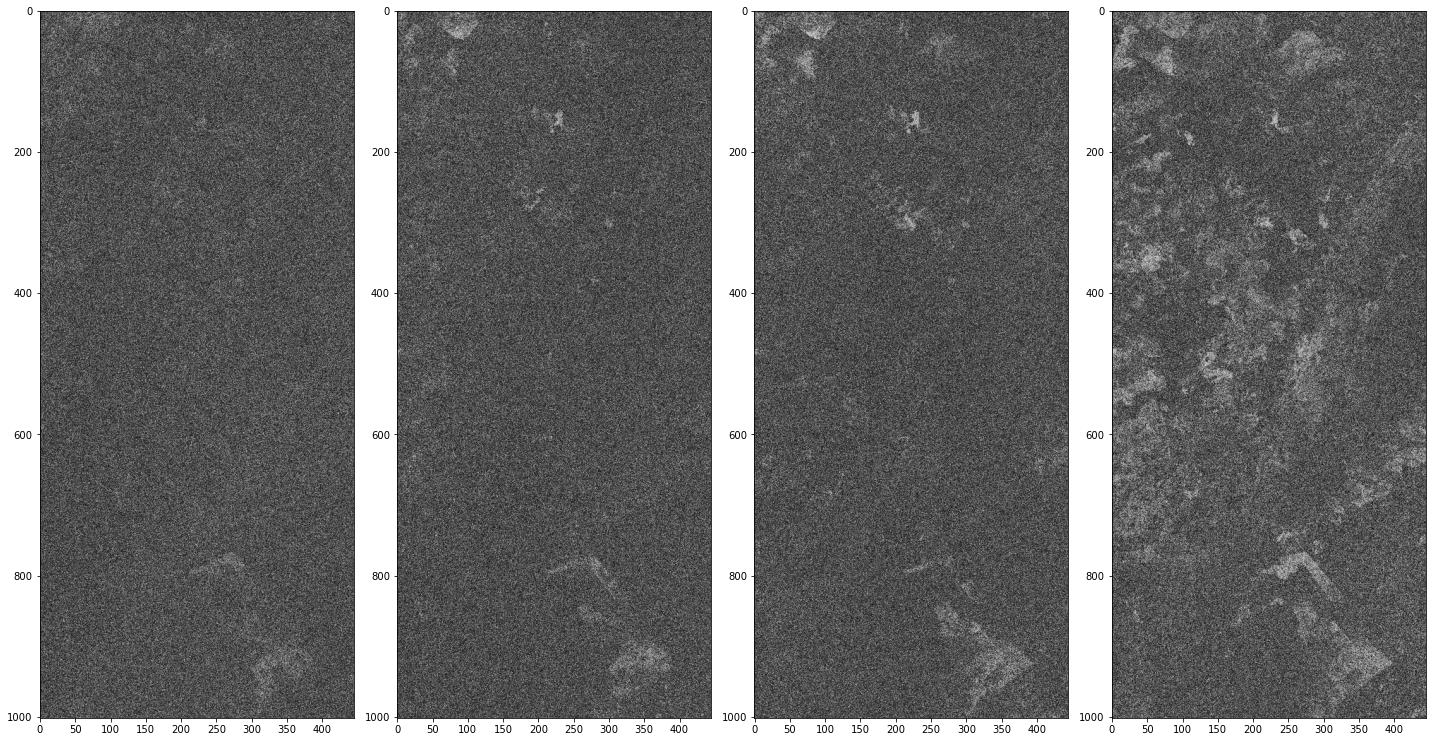

In [2]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import chi2,norm,normaltest
from skimage.filters import threshold_otsu, threshold_yen, threshold_li
from helpers import *

s1Burned1= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200621T091832_20200703T091832.tif'
s1Burned2= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200715T091833_20200727T091834.tif'
s1Burned3= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200808T091834_20200820T091835.tif'
s1Burned4= 'https://store.terradue.com/nextgeoss-change-detection-s1/s1Burned/CCD_20200901T091836_20200913T091836.tif'
aoi_bbox = '-56.6,-16.95,-56.4,-16.5'
aoi = [float(coord) for coord in aoi_bbox.split(',')]
img_data1 = vsi_download(s1Burned1, aoi)
img_data2 = vsi_download(s1Burned2, aoi)
img_data3 = vsi_download(s1Burned3, aoi)
img_data4 = vsi_download(s1Burned4, aoi)
layers = []
layers.append(img_data1[:,:,2])
layers.append(img_data2[:,:,2])
layers.append(img_data3[:,:,2])
layers.append(img_data4[:,:,2])
image = np.dstack(layers)
plot_bands_row(image,vmin=0,vmax=1)

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import chi2,norm,normaltest
from skimage.filters import threshold_otsu, threshold_yen, threshold_li
from helpers import *

In [16]:
np.save('ex1',img_data1)
np.save('ex2',img_data2)
np.save('ex3',img_data3)
np.save('ex4',img_data4)

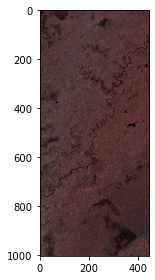

In [4]:
img_data1 = np.load('ex1.npy')
img_data2 = np.load('ex2.npy')
img_data3 = np.load('ex3.npy')
img_data4 = np.load('ex4.npy')
plot_rgb(convert2byte(img_data1[:,:,0],0,0.5),convert2byte(img_data1[:,:,1],0,0.5),convert2byte(img_data1[:,:,1],0,0.5))

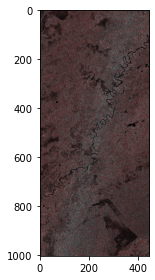

In [5]:
plot_rgb(convert2byte(img_data2[:,:,0],0,0.5),convert2byte(img_data2[:,:,1],0,0.5),convert2byte(img_data2[:,:,1],0,0.5))

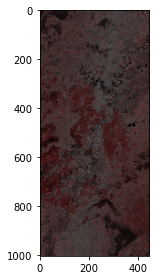

In [6]:
plot_rgb(convert2byte(img_data3[:,:,0],0,0.5),convert2byte(img_data3[:,:,1],0,0.5),convert2byte(img_data3[:,:,1],0,0.5))

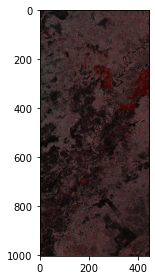

In [7]:
plot_rgb(convert2byte(img_data4[:,:,0],0,0.5),convert2byte(img_data4[:,:,1],0,0.5),convert2byte(img_data4[:,:,1],0,0.5))

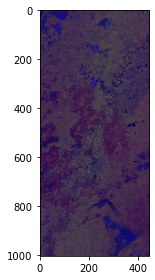

In [10]:
plot_rgb(convert2byte(img_data3[:,:,0],0,0.5),convert2byte(img_data3[:,:,1],0,0.5),convert2byte(img_data3[:,:,2],0,1))

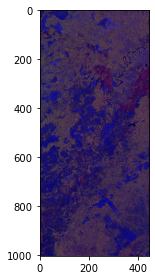

In [9]:
plot_rgb(convert2byte(img_data4[:,:,0],0,0.5),convert2byte(img_data4[:,:,1],0,0.5),convert2byte(img_data4[:,:,2],0,1))

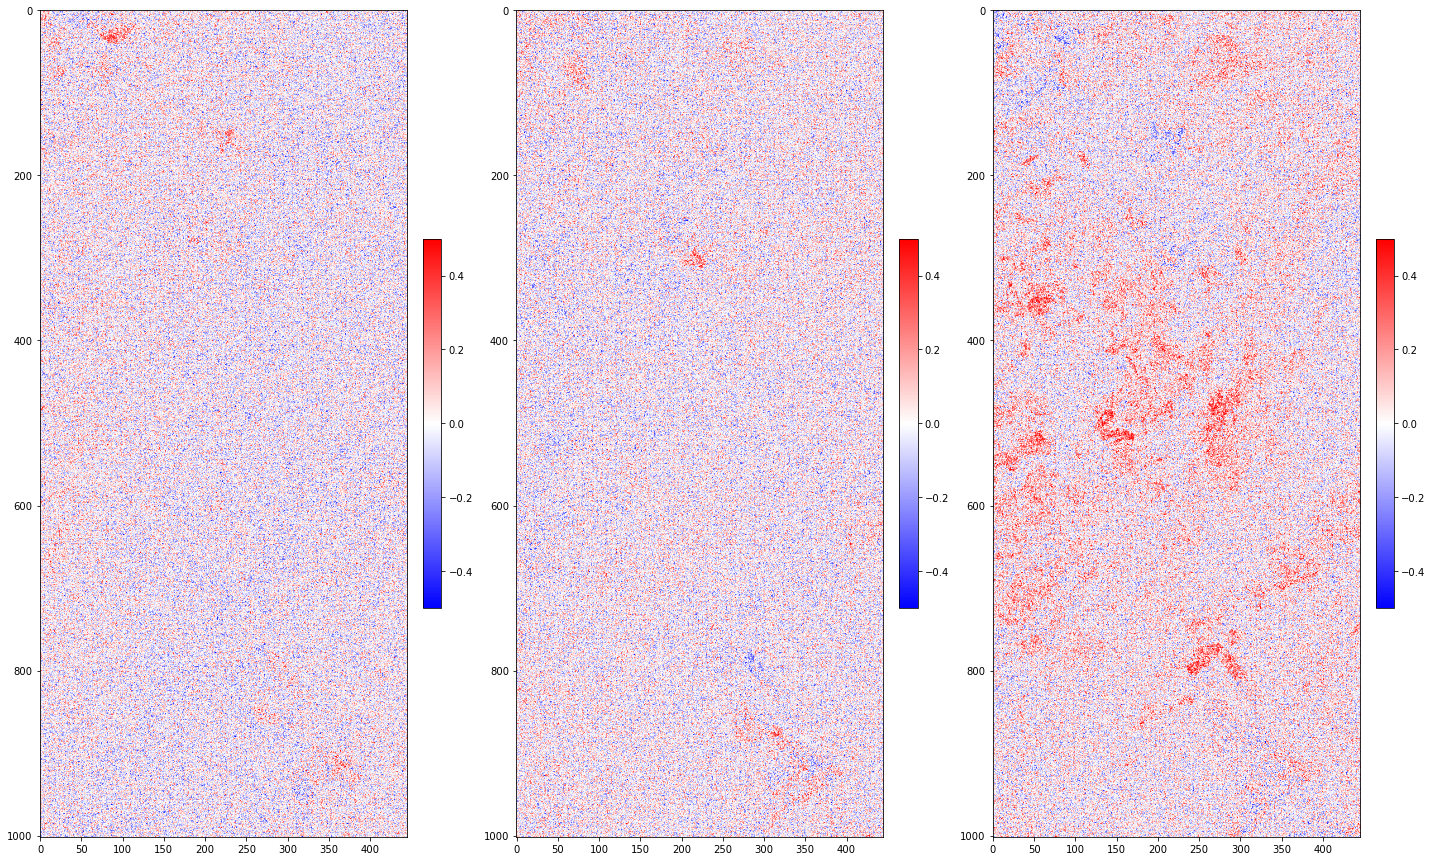

In [13]:
layers = []
layers.append(img_data2[:,:,2]-img_data1[:,:,2])
layers.append(img_data3[:,:,2]-img_data2[:,:,2])
layers.append(img_data4[:,:,2]-img_data3[:,:,2])
image = np.dstack(layers)
plot_bands_row(image,vmin=-0.5,vmax=0.5,cmap=plt.cm.bwr, colormap=True)

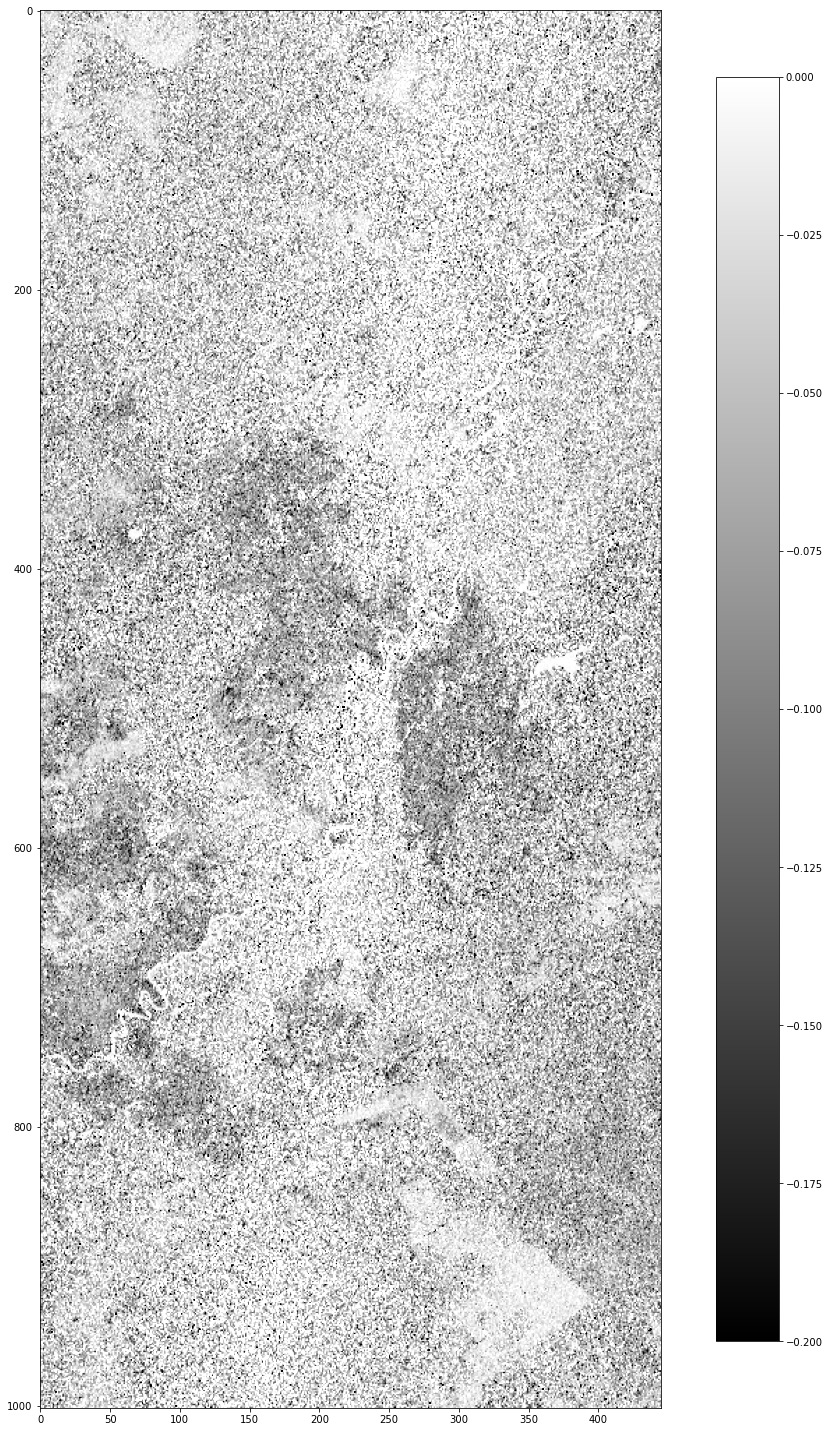

In [19]:
plot_bands_row(img_data3[:,:,1]-img_data3[:,:,0],vmin=-0.20,vmax=0, colormap=True)